In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv('diamonds.csv')
df = df.join(pd.get_dummies(df['cut']))
df = df.join(pd.get_dummies(df['color']))
df = df.join(pd.get_dummies(df['clarity']))
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0


In [6]:
df.describe()

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.029848,0.090953,0.399537,...,0.100519,0.052058,0.013737,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.170169,0.287545,0.489808,...,0.300694,0.222146,0.116400,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# encode cut, color and clarity
categorical_cols = ['cut', 'color', 'clarity']
for c in categorical_cols:
    df[c] = pd.factorize(df[c])[0]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,0,1,0,0,0,0


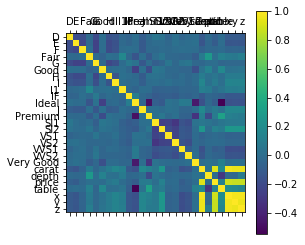

In [8]:
#reduce set w/o categorical features
df_reduced = df[df.columns.difference(['cut', 'color', 'clarity'])]
# correlations
plt.matshow(df_reduced.corr())
plt.colorbar()
tick_marks = df_reduced.columns.values
plt.xticks(np.arange(tick_marks.size), tick_marks)
plt.yticks(np.arange(tick_marks.size), tick_marks)
plt.show()

In [10]:
import pandas.plotting.scatter_matrix

scatter_matrix(df_reduced, diagonal='kde')
plt.grid()
plt.show()

ImportError: No module named scatter_matrix

In [ ]:
# split
from sklearn.model_selection import train_test_split

X, y = dmds.iloc[:, dmds.columns != 'price'].values, dmds.iloc[:, dmds.columns == 'price'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = [('LR', LinearRegression(n_jobs=-1)),
          ('RF', RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1, n_jobs=-1)),
#           ('SVR-lin', SVR(kernel='linear', C=1e3))
#           ('SVR-rbf', SVR(kernel='rbf', C=1e3)),
#           ('SVR-poly', SVR(kernel='poly', C=1e3, degree=2))
         ]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=123)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1)    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# compute ms-error and R^2
for name, model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print('%s: MSE train: %.4f, test: %.4f' % (name, mean_squared_error(y_train, y_train_pred),
                                           mean_squared_error(y_test, y_test_pred)))
    print('%s: R^2 train: %.4f, test: %.4f' % (name, r2_score(y_train, y_train_pred),
                                           r2_score(y_test, y_test_pred)))

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.grid()
plt.show()

In [ ]:
#classification
# convert price data to classes
n_classes = 10

y_classes = np.linspace(0, y.max(), n_classes)
y_train_cl = np.digitize(y_train, bins=y_classes)
y_test_cl = np.digitize(y_test, bins=y_classes)

print('Price classes: %s' % (y_classes))

In [ ]:
# test different models on the data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('SVM-lin', SVC(kernel='linear')),
          ('SVM-rbf', SVC(kernel='rbf')),
          ('RF', RandomForestClassifier()),
          ('MLP', MLPClassifier(alpha=1)),
          ('ADA', AdaBoostClassifier())]

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train_cl, cv=kfold, n_jobs=-1)    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.grid()
plt.show()

In [ ]:
# convert price data to classes
n_classes = 5

y_classes = np.linspace(0, y.max(), n_classes)
y_train_cl = np.digitize(y_train, bins=y_classes)
y_test_cl = np.digitize(y_test, bins=y_classes)

print('Price classes: %s' % (y_classes))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train_cl, cv=kfold, n_jobs=-1)    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.grid()
plt.show()